# U.S. Medical Insurance Costs

First thing first. Import the file

In [496]:
import csv
from matplotlib import pyplot as plt

with open('insurance.csv', 'r') as file:
    file_lines = file.readlines()
    
file_columns = file_lines[0] #Data fields
file_data = file_lines[1:] #Data - dont erase this variable
total_rows = len(file_data) # dont erase this variable
print(file_columns, total_rows)

age,sex,bmi,children,smoker,region,charges
 1338


MAIN INFO
--------------

There are 7 columns that gives the following info:

1.- age

2.- sex

3.- bmi

4.- children

5.- smoker

6.- region

7.- charges

There are 1338 records on this dataset. I understand this dataset has no NULL values. And all are string type since a single record is surrounded by single quotes.
Let's have a more deep inspection here on each variable. Let's create dictionaries to store the count on them, and then prepare the dataset to start filling up the dictionaries.


In [509]:
# age will be a dictionary that stores counting on every age.
age_dict = {}
# sex will be a dicttionary that stores the counting of sex.
sex_dict = {}
# bmi will be a dictionary that stores counting on every bmi.
bmi_dict = {}
# children will be a dicttionary that stores the counting of children.
children_dict = {}
# smoker will be a dictionary that stores counting on smoker person.
smoker_dict = {}
# region will be a dicttionary that stores the counting of region.
region_dict = {}
# charges will be a dictionary that stores counting on every charge.
charges_dict = {}

#Since a single row is a full string of data. First I need to strip, split and then store the data into
#another variable.
data_lists = []
for row in file_data:
    if len(data_lists) > total_rows:
        break
    row_clean = row.strip()
    data = row_clean.split(',')
    data_lists.append(data)
print(data_lists[:3])

[['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924'], ['18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523'], ['28', 'male', '33', '3', 'no', 'southeast', '4449.462']]


In [510]:
# Now. Lets loop the dataset and filling up the dictionaries with the counting of each variable.
for row in data_lists:
    age = row[0]
    sex = row[1]
    bmi = row[2]
    children = row[3]
    smoker = row[4]
    region = row[5]
    charges = row[6]
    if age not in age_dict:
        age_dict[age] = 1
    else: age_dict[age] += 1
    if sex not in sex_dict:
        sex_dict[sex] = 1
    else: sex_dict[sex] += 1
    if bmi not in bmi_dict:
        bmi_dict[bmi] = 1
    else: bmi_dict[bmi] += 1
    if children not in children_dict:
        children_dict[children] = 1
    else: children_dict[children] += 1
    if smoker not in smoker_dict:
        smoker_dict[smoker] = 1
    else: smoker_dict[smoker] += 1
    if region not in region_dict:
        region_dict[region] = 1
    else: region_dict[region] += 1
    if charges not in charges_dict:
        charges_dict[charges] = 1
    else: charges_dict[charges] += 1


In [511]:
# now lets visualize the counting... sorted from highest to lowest... 


#create a function to sort dictionary
def dic_sort(dict_1, mode = 'Keys', reverse = 'No'):
    if mode == 'Values' and reverse == 'Yes':
        return sorted(dict_1.items(), key = lambda item:item[1], reverse= True)
    elif mode == 'Values' and reverse == 'No':
        return sorted(dict_1.items(), key = lambda item:item[1])
    elif mode == 'Keys' and reverse =='No':
        return sorted(dict_1.items())
    elif mode == 'Keys' and reverse == 'Yes':
        return sorted(dict_1.items(), reverse= True)
    else:
        return sorted(dict_1.items())

print("AGE DICTIONARY, sorted by values, from high to low.")
print(dic_sort(age_dict, mode = 'Values', reverse = 'Yes'))
print('---------------')
print("SEX DICTIONARY")
print(sex_dict)
print('---------------')
print("BMI DICTIONARY, sorted by values, from high to low.")
print(dic_sort(bmi_dict, mode = 'Values', reverse = 'Yes'))
print('---------------')
print("SMOKER DICTIONARY")
print(smoker_dict)
print('---------------')
print("NUM OF CHILDREN DICTIONARY")
print(children_dict)
print('---------------')
print("REGION DICTIONARY")
print(region_dict)
print('---------------')
print("CHARGES DICTIONARY, sorted by values, from high to low.")
print(dic_sort(charges_dict, mode = 'Values', reverse = 'Yes'))

AGE DICTIONARY, sorted by values, from high to low.
[('18', 69), ('19', 68), ('46', 29), ('52', 29), ('48', 29), ('20', 29), ('45', 29), ('47', 29), ('51', 29), ('50', 29), ('28', 28), ('25', 28), ('23', 28), ('27', 28), ('22', 28), ('26', 28), ('24', 28), ('21', 28), ('53', 28), ('54', 28), ('49', 28), ('31', 27), ('30', 27), ('41', 27), ('40', 27), ('43', 27), ('44', 27), ('29', 27), ('42', 27), ('33', 26), ('32', 26), ('56', 26), ('34', 26), ('55', 26), ('57', 26), ('37', 25), ('59', 25), ('35', 25), ('38', 25), ('36', 25), ('58', 25), ('39', 25), ('60', 23), ('62', 23), ('63', 23), ('61', 23), ('64', 22)]
---------------
SEX DICTIONARY
{'female': 662, 'male': 676}
---------------
BMI DICTIONARY, sorted by values, from high to low.
[('32.3', 13), ('28.31', 9), ('28.88', 8), ('34.1', 8), ('30.8', 8), ('30.875', 8), ('31.35', 8), ('30.495', 8), ('32.775', 7), ('35.2', 7), ('27.36', 7), ('34.8', 7), ('25.46', 7), ('32.11', 7), ('30.59', 7), ('38.06', 7), ('24.32', 7), ('27.645', 7), ('

Conclusions on a first glimpse on the data counting

- On the variables ages, bmi and insurance costs it's quite not useful to give any conclusion yet. It would be much better to categorize them, in order to have a better assessment on trends. Although I can say that young people with 18 and 19 (outliers) have up to 2.7x against any other contracts by age. Also, i can say with some confidence that elderly people (above 60) is the group with fewer insurance contracts. With BMI and Insurance Cost, the data is to well distributed to grasp any insight yet.
- There are 4x Non Smokers more for one single smoker. 
- There are little bit more of parents contracting rather than no-parents. 
- Region and sex variables seems normal. And since there are less than 5 keys, it don't require further classification.


 Let's create a Class with some function to test on "Age", "BMI" and "Charges" variable to take a better look. 

In [512]:
class Factor:
    """
    Class Factor will take the dictionary of a variable. The KEY is the variable, and VALUE is the counting. 
    This class Factor will held several functions like Average or Standard Deviation.
    """
    TOTAL_ROWS = 1338
    
    def __init__(self, dictionary):
        self.dictionary = dictionary
    
    def dic_sort(self, mode = 'Keys', reverse = 'No'):
        if mode == 'Values' and reverse == 'Yes':
            return sorted(self.dictionary.items(), key = lambda item:item[1], reverse= True)
        elif mode == 'Values' and reverse == 'No':
            return sorted(self.dictionary.items(), key = lambda item:item[1])
        elif mode == 'Keys' and reverse =='No':
            return sorted(self.dictionary.items())
        elif mode == 'Keys' and reverse == 'Yes':
            return sorted(self.dictionary.items(), reverse= True)
        else:
            return sorted(self.dictionary.items())
    
    def average(self):
        total_list = sum([float(k)*v for k,v in self.dictionary.items()])
        return round(total_list/Factor.TOTAL_ROWS,1)  
    
    def median(self):
        dic_sorted = self.dic_sort(self.dictionary)
        list_dict = []
        for k, v in dic_sorted:
            for i in range(v):
                list_dict.append(k)    
        median = list_dict[int(len(list_dict)/2)]
        return median
    
    def proportion(self):
        new_dict = {}
        for key, value in self.dictionary.items():
            new_dict[key] = round((value/Factor.TOTAL_ROWS*100),2)
        return new_dict

    def std_dvt(self):
        mean = self.average()
        list_dict = []
        for k, v in self.dictionary.items():
            for i in range(v):
                list_dict.append(k)  
        lst_floats = list(map(float, list_dict))
        numerator = sum([(x - mean)**2 for x in lst_floats])
        denominator = len(list_dict)
        return round((numerator/denominator)**0.5, 1)
    
    def min_key(self):
        return min(self.dictionary)
    
    def max_key(self):
        return max(self.dictionary)
         
    def chart(self):
        x_values = self.dictionary.keys()
        y_values = self.dictionary.values()
        plt.bar(x_values, y_values)
        plt.xlabel("KEYS")
        plt.ylabel("FREQUENCIES")
        return plt.show()


Let's work with the variable ages. Let's summary counting by 10 year frames and by 4 categories which holds 8 years stream and the last one holds 10 years. The labels are: young, adult young, adult, adult Old, Old).
    Young = 18 - 26
    Young Adult = 27 - 35
    Adult = 36 - 44
    Adult Old = 45 - 53
    Old = 54 - 64
    
 This classification is to grasp a better visualization on Ages Data.

In [513]:
class Factor_Age(Factor):
    """
    This class will add more functions but only regarding to age.
    """
    def __init__(self, dictionary):
        Factor.__init__(self, dictionary)
    
    def categorize(self):
        dict_categories = {'Young':0, 'Young Adult': 0, 'Adult':0, 'Adult Old':0, 'Old':0}
        for key,value in self.dictionary.items():
            num = int(key)
            if num in range(18,27):
                dict_categories['Young'] += value
            elif num in range(27,36):
                dict_categories['Young Adult'] += value
            elif num in range(36,45):
                dict_categories['Adult'] += value
            elif num in range(45, 54):
                dict_categories['Adult Old'] += value
            elif num in range(54,65):
                dict_categories['Old'] += value
        return dict_categories    

    def proportion(self):
        new_dict = {}
        for key, value in self.categorize().items():
            new_dict[key] = round((value/Factor.TOTAL_ROWS*100),2)
        return new_dict
    
    def chart(self):
        x_values = self.categorize().keys()
        y_values = self.categorize().values()
        plt.bar(x_values, y_values)
        plt.xlabel("KEYS")
        plt.ylabel("FREQUENCIES")
        return plt.show()


Age Statistical Data
The average of age contracting insurance is:  39.2
The median age contracting insurance is:  39
The Sandard Deviation of age is:  14.0
The minimum age is:  18
The maximum age is:  64
Age categorization is:  {'Young': 334, 'Young Adult': 240, 'Adult': 235, 'Adult Old': 259, 'Old': 270}
Age categorizacion proportion is:  {'Young': 24.96, 'Young Adult': 17.94, 'Adult': 17.56, 'Adult Old': 19.36, 'Old': 20.18}


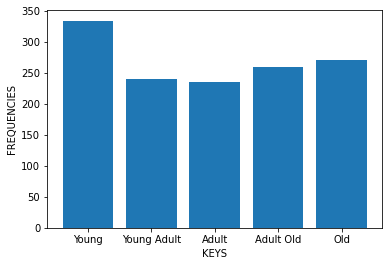

None


In [514]:
ages_1 = Factor_Age(age_dict)
print("Age Statistical Data")
print("The average of age contracting insurance is: ", ages_1.average())
print("The median age contracting insurance is: ", ages_1.median())
print("The Sandard Deviation of age is: ", ages_1.std_dvt())
print("The minimum age is: ", ages_1.min_key())
print("The maximum age is: ", ages_1.max_key())
print("Age categorization is: ", ages_1.categorize())
print("Age categorizacion proportion is: ", ages_1.proportion())
print(ages_1.chart())


Now!. It's the turn of BMI classification.
According to the average result founded in web. We can classify MBI under 5 categories:
    Underweight: < 18.5
    Normal: 18.5 - 24.9
    Overweight: 25 - 29.9 
    Obese: 30 - 34.9
    Extremely Obese: > 35
 
 Let's create a function that counts BMI under every category and return a dict.

In [515]:
class Factor_bmi(Factor):
    """
    This child class works only with BMI data. 
    """
    def __init__(self, dictionary):
        Factor.__init__(self, dictionary)
        
    def categorize(self):
        dict_categories = {'Underweight':0, 'Normal': 0, 'Overweight':0, 'Obese':0, 'Extremely Obese':0}
        for key,value in self.dictionary.items():
            num = float(key)
            if num < 18.5:
                dict_categories['Underweight'] += value
            elif num >= 18.5 and num <= 24.9:
                dict_categories['Normal'] += value
            elif num >= 25.0 and num <= 29.9:
                dict_categories['Overweight'] += value
            elif num >= 30 and num <= 34.9:
                dict_categories['Obese'] += value
            elif num >= 35:
                dict_categories['Extremely Obese'] += value
        return dict_categories
        
    def proportion(self):
        new_dict = {}
        for key, value in self.categorize().items():
            new_dict[key] = round((value/Factor.TOTAL_ROWS*100),2)
        return new_dict
    
    def chart(self):
        x_values = self.categorize().keys()
        y_values = self.categorize().values()
        plt.bar(x_values, y_values)
        plt.xlabel("KEYS")
        plt.ylabel("FREQUENCIES")
        return plt.show()   
        

BMI Statistical Data
The average of BMI contracting insurance is:  30.7
The median bmi contracting insurance is:  30.4
The standard deviation of BMI is:  6.1
The minimum BMI is:  15.96
The maximum BMI is:  53.13
BMI categorization is:  {'Underweight': 20, 'Normal': 222, 'Overweight': 377, 'Obese': 388, 'Extremely Obese': 316}
BMI proportions are:  {'Underweight': 1.49, 'Normal': 16.59, 'Overweight': 28.18, 'Obese': 29.0, 'Extremely Obese': 23.62}


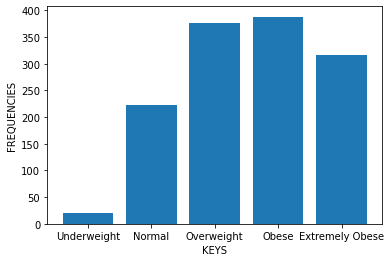

None


In [516]:
bmi_1 = Factor_bmi(bmi_dict)
print("BMI Statistical Data")
print("The average of BMI contracting insurance is: ", bmi_1.average())
print("The median bmi contracting insurance is: ", bmi_1.median())
print("The standard deviation of BMI is: ", bmi_1.std_dvt())
print("The minimum BMI is: ", bmi_1.min_key())
print("The maximum BMI is: ", bmi_1.max_key())
print("BMI categorization is: ", bmi_1.categorize())
print("BMI proportions are: ", bmi_1.proportion())
print(bmi_1.chart())

Now!. It's the turn of Insurance_Cost classification.
I want to remark that there is no a standard classification on how to consider an insurance cost. Therefore, I'm just going to distribute on 12k ranks:
    Cheapest: < 12k
    Cheap: 12k - 24k
    Normal: 25k - 37k
    Expensive: 38k - 50k
    Really Pricy: 51k +
 

In [517]:
class Factor_Charge(Factor):
    """
    This child class works only with "Charges" data. 
    """
    def __init__(self, dictionary):
        Factor.__init__(self, dictionary)
    
    def categorize(self):
        dict_categories = {'Cheapest':0, 'Cheap': 0, 'Normal':0, 'Expensive':0, 'Really Pricy':0}
        for key,value in self.dictionary.items():
            num = float(key)
            if num < 12000:
                dict_categories['Cheapest'] += value
            elif num >= 12000 and num <= 24999:
                dict_categories['Cheap'] += value
            elif num >= 25000 and num <= 37999:
                dict_categories['Normal'] += value
            elif num >= 38000 and num <= 50999:
                dict_categories['Expensive'] += value
            elif num >= 51000:
                dict_categories['Really Pricy'] += value
        return dict_categories

    def proportion(self):
        new_dict = {}
        for key, value in self.categorize().items():
            new_dict[key] = round((value/Factor.TOTAL_ROWS*100),2)
        return new_dict
    
    def chart(self):
        x_values = self.categorize().keys()
        y_values = self.categorize().values()
        plt.bar(x_values, y_values)
        plt.xlabel("KEYS")
        plt.ylabel("FREQUENCIES")
        return plt.show()   


Charge Statistical Data
The average of Charges on contracting insurance is: $ 13270.4
The median Charge contracting insurance is: $ 31620.00106
The standard deviation of Charge is: $ 12105.5
The minimum Charge is: $ 10043.249
The maximum Charge is: $ 9991.03765
Charges categorization is:  {'Cheapest': 846, 'Cheap': 291, 'Normal': 98, 'Expensive': 96, 'Really Pricy': 7}
Charges proportions are:  {'Cheapest': 63.23, 'Cheap': 21.75, 'Normal': 7.32, 'Expensive': 7.17, 'Really Pricy': 0.52}


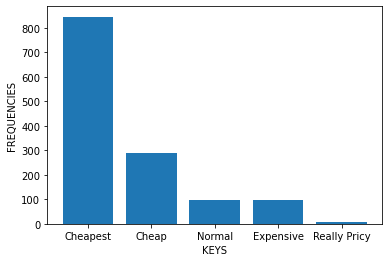

None


In [518]:
charge_1 = Factor_Charge(charges_dict)
print("Charge Statistical Data")
print("The average of Charges on contracting insurance is: $", charge_1.average())
print("The median Charge contracting insurance is: $", charge_1.median())
print("The standard deviation of Charge is: $", charge_1.std_dvt())
print("The minimum Charge is: $", charge_1.min_key())
print("The maximum Charge is: $", charge_1.max_key())
print("Charges categorization is: ", charge_1.categorize())
print("Charges proportions are: ", charge_1.proportion())

print(charge_1.chart())

New Assesment on DATA
-------------------------------

- About Age. Conclusions haven't change that much since initial assumptions, where I noticed that there are not so significant outliers on age 18 and 19 and that the group with less insurance contracts are people above 60. Eventhough, according to the closeness on Median and Avergage results, outliers don't disturb the data distribution. Without "young" outliers, the distributions of values would have been even more flatten with a low disminution on the trend as people get much older. 

- Now. There are more insights found in BMI data. I found out that 80% of people who has insurance are above normal BMI (higher risk of disease). Even further, there are more "extremely obsese" people than "normal weight" ones. And, according to a very low Standard Deviation, people BMI in the dataset, are mostly concentrated in "Overweight" and "Obese" people.

- About insurance costs. With criteria of classification by myself, I can see there's a huge right-skewness on data distribution, which is confirmed by the results of "Average" which is twice as lower than the "Median" result. Distribution of insurance costs are highly concentrated (about 80% of data) in "Cheapest" and "Cheap" categories which data don't surpass $24k by year.


What's the scope of this investigation?
---------------------------------------------

1. The scope of this investigation will be to get a strong sense on which are the most important drivers on pushing down or pulling up the price on the insurance cost.

2. Just for curiosity, who are the people who are paying really insane insurance prices?


First. I need to find correlations on how age, sex, # children, BMI, smoke and location are related to Insurance Costs.
Let's create a function to do this. But previous to that, i need to first transform strings categories for sex and smoker into numeric data. And, since there's a lot to cover, it's better to have a new class to organize my methods.

In [519]:
class Data_Analysis:
    """
    This class will have an input of list(of all data). And organize in several terms.
    """
    def __init__(self, data_list):
        self.data = data_list
        # We need to convert the string letters in self.data into numbers.
        for row in self.data:
            # Female is 1; Male is 2
            if row[1] == 'female':
                row[1] = 1
            elif row[1] == 'male': row[1] = 2
            # non-smoker is 1; smoker is 2
            if row[4] == 'no':
                row[4] = 1
            elif row[4] == 'yes': row[4] = 2

               
    def get_index(self, column):
        # This formula is used to get the index of columns
        ind = 0
        if column == 'age': ind = 0
        elif column == 'sex': ind = 1
        elif column == 'bmi': ind = 2
        elif column == 'children': ind = 3
        elif column == 'smoker': ind = 4
        elif column == 'region': ind = 5
        elif column == 'charges': ind = 6
        
        return ind
    
    
    def corr(self, column_x, column_y):
        # Which is the data column that we are going to match with insurance costs?
        self.col_x = column_x
        self.col_y = column_y
        ind_x = self.get_index(self.col_x)
        ind_y = self.get_index(self.col_y)
        
        # Let's set up the axis and the scatter_plot 
        x_axis = [float(x[ind_x]) for x in self.data]
        y_axis = [(float(x[ind_y])) for x in self.data] 
        plt.scatter(x_axis, y_axis, marker='o', alpha=0.2)
        plt.xlabel(self.col_x)
        plt.ylabel(self.col_y)
        plt.show()
        
        # Let's get the coefficient correlation
        n = len(x_axis)
        total_x_y = sum([float(x[ind_x]) * float(x[ind_y]) for x in self.data])
        total_x_2 = sum([float(x[ind_x]) ** 2 for x in self.data])
        total_y_2 = sum([float(x[ind_y]) ** 2 for x in self.data])
        total_x = sum(x_axis)
        total_y = sum(y_axis)
        numerator = (n * total_x_y) - (total_x * total_y)
        denominator = (((n * total_x_2) - ((total_x)**2))*((n * total_y_2) - ((total_y)**2)))**0.5
        
        return round((numerator/denominator),3)
    

Correlation Chart and Coefficient


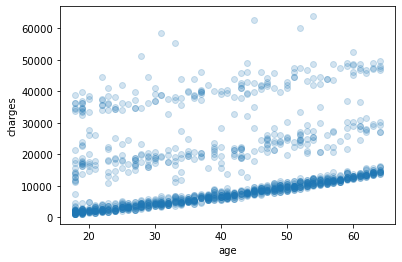

0.299


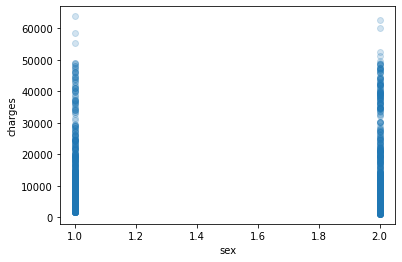

0.057


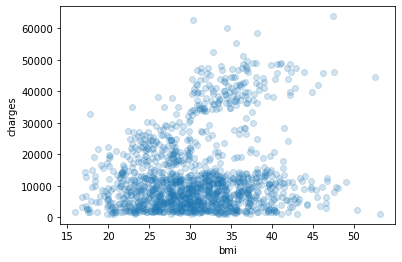

0.198


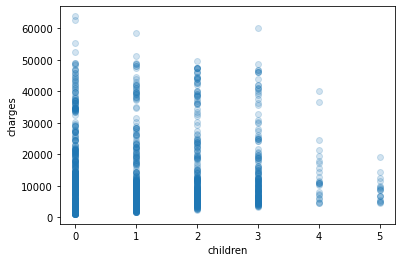

0.068


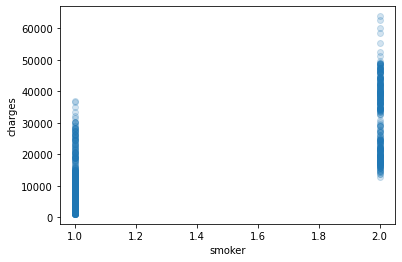

0.787


In [521]:
data_list_1 = Data_Analysis(data_lists) 
print("Correlation Chart and Coefficient")
print(data_list_1.corr('age', 'charges'))
print(data_list_1.corr('sex', 'charges'))
print(data_list_1.corr('bmi', 'charges'))
print(data_list_1.corr('children', 'charges'))
print(data_list_1.corr('smoker', 'charges'))



It's important to remark the influence of "Smoking" factor on the insurance cost. It has the biggest coefficient correlation. Let's scope on this data more deeply.

We are going to find the minimum, maximum, average, median and standard deviation of each insurance cost, considering for "non-smoker" and "smoker people".

Also, I'm going a little more deeper on age and bmi variables to see what i can find.

Statistics Data on "Charges" for People who SMOKE and people who DON'T SMOKE
-----------------------

In [522]:
#Since we are working with lists and not dictionaries. It would be better to create some new functions
    
lst_non_smoker_insurance = [row[6] for row in data_list_1.data if row[4]==1]
lst_smoker_insurance = [row[6] for row in data_list_1.data if row[4]==2]
smoker_zone = list(map(float, lst_smoker_insurance))
non_smoker_zone = list(map(float, lst_non_smoker_insurance))

#Averages Median Standard Deviation

def avg_list(list_1):
    return round(sum(list_1)/len(list_1), 2)

def median_list(list_1):
    index = int(len(list_1)/2)
    lst_sorted = sorted(list_1)
    return lst_sorted[index]

def std_dvt_list(list_1):
    lst_average = avg_list(list_1)
    numerator = sum([(x - lst_average)**2 for x in list_1])
    denominator = len(list_1)
    return round((numerator/denominator)**0.5, 2)

print("For Non-Smokers")
print("Minimum Value: $", round(min(non_smoker_zone),1))
print("Maximum Value: $", round(max(non_smoker_zone),1))
print("Average: $", avg_list(non_smoker_zone))
print("Median: $", median_list(non_smoker_zone))
print("Standard Deviation: $", std_dvt_list(non_smoker_zone))
print("-----------------------------")
print("For Smokers")
print("Minimum Value: $", round(min(smoker_zone),1))
print("Maximum Value: $", round(max(smoker_zone),1))
print("Average: $", avg_list(smoker_zone))
print("Median: $", median_list(smoker_zone))
print("Standard Deviation: $", std_dvt_list(smoker_zone))

For Non-Smokers
Minimum Value: $ 1121.9
Maximum Value: $ 36910.6
Average: $ 8434.27
Median: $ 7345.7266
Standard Deviation: $ 5990.96
-----------------------------
For Smokers
Minimum Value: $ 12829.5
Maximum Value: $ 63770.4
Average: $ 32050.23
Median: $ 34472.841
Standard Deviation: $ 11520.47


In [523]:
dict_age_categories = {'Young':[], 'Young Adult': [], 'Adult':[], 'Adult Old':[], 'Old':[]}
for row in data_list_1.data:
    num = int(row[0])
    if num in range(18,27):            
        dict_age_categories['Young'].append(row[6]) 
    elif num in range(27,36):
        dict_age_categories['Young Adult'].append(row[6])
    elif num in range(36,45):
        dict_age_categories['Adult'].append(row[6])
    elif num in range(45, 54):
        dict_age_categories['Adult Old'].append(row[6])
    elif num in range(54,65):
        dict_age_categories['Old'].append(row[6])
#print(dict_age_categories)

young_list = list(map(float, dict_age_categories['Young']))
young_adult_list = list(map(float, dict_age_categories['Young Adult']))
adult_list = list(map(float, dict_age_categories['Adult']))
adult_old_list = list(map(float, dict_age_categories['Adult Old']))
old_list = list(map(float, dict_age_categories['Old']))

print("-----------------------------")
print("For Young People")
print("Minimum Value: $", round(min(young_list),1))
print("Maximum Value: $", round(max(young_list),1))
print("Average: $", avg_list(young_list))
print("Median: $", median_list(young_list))
print("Standard Deviation: $", std_dvt_list(young_list))
print("-----------------------------")
print("For Young Adult People")
print("Minimum Value: $", round(min(young_adult_list),1))
print("Maximum Value: $", round(max(young_adult_list),1))
print("Average: $", avg_list(young_adult_list))
print("Median: $", median_list(young_adult_list))
print("Standard Deviation: $", std_dvt_list(young_adult_list))
print("-----------------------------")
print("For Adult People")
print("Minimum Value: $", round(min(adult_list),1))
print("Maximum Value: $", round(max(adult_list),1))
print("Average: $", avg_list(adult_list))
print("Median: $", median_list(adult_list))
print("Standard Deviation: $", std_dvt_list(adult_list))
print("-----------------------------")
print("For Adult Old People")
print("Minimum Value: $", round(min(adult_old_list),1))
print("Maximum Value: $", round(max(adult_old_list),1))
print("Average: $", avg_list(adult_old_list))
print("Median: $", median_list(adult_old_list))
print("Standard Deviation: $", std_dvt_list(adult_old_list))
print("-----------------------------")
print("For Old People")
print("Minimum Value: $", round(min(old_list),1))
print("Maximum Value: $", round(max(old_list),1))
print("Average: $", avg_list(old_list))
print("Median: $", median_list(old_list))
print("Standard Deviation: $", std_dvt_list(old_list))



-----------------------------
For Young People
Minimum Value: $ 1121.9
Maximum Value: $ 44501.4
Average: $ 8839.44
Median: $ 2731.9122
Standard Deviation: $ 11478.9
-----------------------------
For Young Adult People
Minimum Value: $ 2483.7
Maximum Value: $ 58571.1
Average: $ 11003.99
Median: $ 5116.5004
Standard Deviation: $ 11577.49
-----------------------------
For Adult People
Minimum Value: $ 4399.7
Maximum Value: $ 48885.1
Average: $ 13328.53
Median: $ 7265.7025
Standard Deviation: $ 11878.06
-----------------------------
For Adult Old People
Minimum Value: $ 7147.1
Maximum Value: $ 62592.9
Average: $ 15539.92
Median: $ 9877.6077
Standard Deviation: $ 11390.17
-----------------------------
For Old People
Minimum Value: $ 9850.4
Maximum Value: $ 63770.4
Average: $ 18538.71
Median: $ 13143.33665
Standard Deviation: $ 11629.95


In [524]:
dict_bmi_categories = {'Underweight':[], 'Normal': [], 'Overweight':[], 'Obese':[], 'Extremely Obese':[]}
for row in data_list_1.data:
    num = float(row[2])
    if num < 18.5:
        dict_bmi_categories['Underweight'].append(row[6])
    elif num >= 18.5 and num <= 24.9:
        dict_bmi_categories['Normal'].append(row[6])
    elif num >= 25.0 and num <= 29.9:
        dict_bmi_categories['Overweight'].append(row[6])
    elif num >= 30 and num <= 34.9:
        dict_bmi_categories['Obese'].append(row[6])
    elif num >= 35:
        dict_bmi_categories['Extremely Obese'].append(row[6])
            
underweight_list = list(map(float, dict_bmi_categories['Underweight']))
normal_list = list(map(float, dict_bmi_categories['Normal']))
overweight_list = list(map(float, dict_bmi_categories['Overweight']))
obese_list = list(map(float, dict_bmi_categories['Obese']))
extremely_obese_list = list(map(float, dict_bmi_categories['Extremely Obese']))

print("-----------------------------")
print("For Underweight People")
print("Minimum Value: $", round(min(underweight_list),1))
print("Maximum Value: $", round(max(underweight_list),1))
print("Average: $", avg_list(underweight_list))
print("Median: $", median_list(underweight_list))
print("Standard Deviation: $", std_dvt_list(underweight_list))
print("-----------------------------")
print("For Normal People")
print("Minimum Value: $", round(min(normal_list),1))
print("Maximum Value: $", round(max(normal_list),1))
print("Average: $", avg_list(normal_list))
print("Median: $", median_list(normal_list))
print("Standard Deviation: $", std_dvt_list(normal_list))
print("-----------------------------")
print("For Overweight People")
print("Minimum Value: $", round(min(overweight_list),1))
print("Maximum Value: $", round(max(overweight_list),1))
print("Average: $", avg_list(overweight_list))
print("Median: $", median_list(overweight_list))
print("Standard Deviation: $", std_dvt_list(overweight_list))
print("-----------------------------")
print("For Obese People")
print("Minimum Value: $", round(min(obese_list),1))
print("Maximum Value: $", round(max(obese_list),1))
print("Average: $", avg_list(obese_list))
print("Median: $", median_list(obese_list))
print("Standard Deviation: $", std_dvt_list(obese_list))
print("-----------------------------")
print("For Extremely Obese People")
print("Minimum Value: $", round(min(extremely_obese_list),1))
print("Maximum Value: $", round(max(extremely_obese_list),1))
print("Average: $", avg_list(extremely_obese_list))
print("Median: $", median_list(extremely_obese_list))
print("Standard Deviation: $", std_dvt_list(extremely_obese_list))


-----------------------------
For Underweight People
Minimum Value: $ 1621.3
Maximum Value: $ 32734.2
Average: $ 8852.2
Median: $ 6877.9801
Standard Deviation: $ 7539.18
-----------------------------
For Normal People
Minimum Value: $ 1121.9
Maximum Value: $ 35069.4
Average: $ 10379.5
Median: $ 8604.48365
Standard Deviation: $ 7483.8
-----------------------------
For Overweight People
Minimum Value: $ 1252.4
Maximum Value: $ 38245.6
Average: $ 10993.99
Median: $ 8703.456
Standard Deviation: $ 7995.88
-----------------------------
For Obese People
Minimum Value: $ 1131.5
Maximum Value: $ 62592.9
Average: $ 14298.84
Median: $ 9563.029
Standard Deviation: $ 13443.62
-----------------------------
For Extremely Obese People
Minimum Value: $ 1141.4
Maximum Value: $ 63770.4
Average: $ 16953.82
Median: $ 10959.6947
Standard Deviation: $ 15563.0


Now. I've found that there are big changes on how the "charge payments" are distributed when someone smokes and one who doesn't. I need to take a closer look on looking at variables and their correlation with their insurance cost, spliting the data wether the person smokes or doesn't.

In relation to the Age variable, there's a common pattern that indicates that as someone increases its age, also does it's insurance payment. This is confirmed by the uptrend on minimum, median and average results on insurance payment for each classification on Age.

For BMI, there's also an uptrend on the insurance payment charge as long as someone is more fat. This is confirmed by the uptrend on average and maximum values. Nevertheless, the standard deviation becomes wider and the minimum values stays as low as in every classification. This implies that BMI variable is not as signifcant in the Charges Payment Algorithm as the variable "Age" does.  

Correlations of "Charges" of People who don't Smokes vs Other Variables
-----------------------

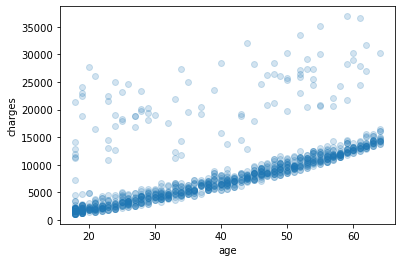

0.628


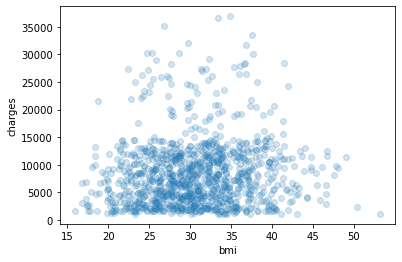

0.084


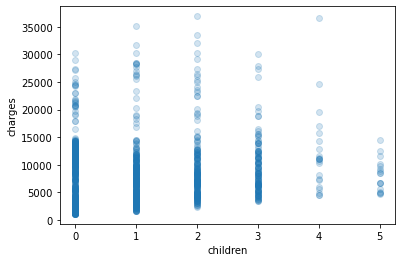

0.139


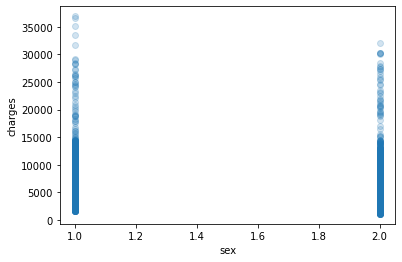

-0.056


In [525]:
people_dont_smoke = [row for row in data_list_1.data if row[4] == 1]
data_dont_smoke = Data_Analysis(people_dont_smoke)
print(data_dont_smoke.corr('age', 'charges'))
print(data_dont_smoke.corr('bmi', 'charges'))
print(data_dont_smoke.corr('children', 'charges'))
print(data_dont_smoke.corr('sex', 'charges'))


WOW!. Big insight here. The correlation between age and insurance charge, for people who don't smoke, is twice the global correlation. Other factors, like BMI, doesn't matter that much... Tha could confirm that Smoking is the stronger driver to pull up the price, followed by the age factor.

Correlations of "Charges" of People who Smokes vs Other Variables
-----------------------

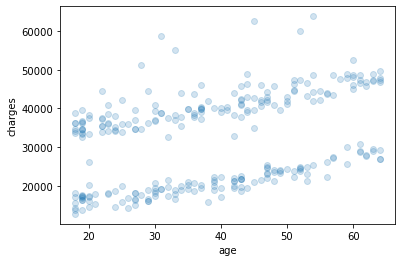

0.368


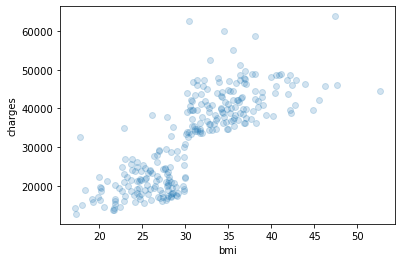

0.806


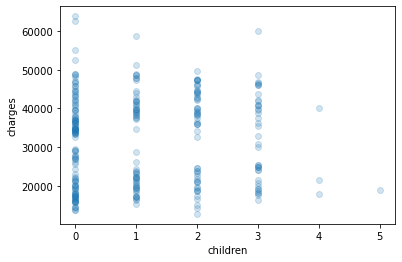

0.036


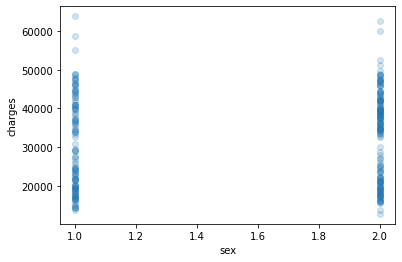

0.101


In [526]:
people_smoke = [row for row in data_list_1.data if row[4] == 2]
data_smoke = Data_Analysis(people_smoke)
print(data_smoke.corr('age', 'charges'))
print(data_smoke.corr('bmi', 'charges'))
print(data_smoke.corr('children', 'charges'))
print(data_smoke.corr('sex', 'charges'))


This is interesting!. For people who smokes, the biggest correlation with insurance cost, is BMI. Considering global correlations, BMI had some importance consideration regarding on driving insurance prices up or down. But, by inspecting only people who smokes, it has the biggest correlation with charges, with a result of 0.8. Suddenly, BMI became such a strong driver... But, why it wasn't such a big driver on prices for people who don't smoke? My guess here is that Higher BMI is a sincere representation for people who smokes rather than people who doesn't. To prove this, I need to find the correlation between smoking and BMI. 

Correlation of Smoking option vs BMI 
--------------------------------------------


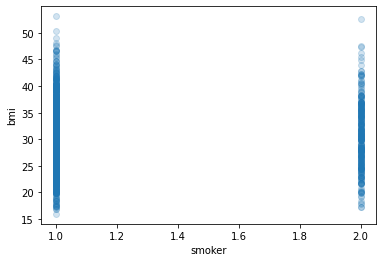

0.004


In [527]:
print(data_list_1.corr('smoker', 'bmi'))


Ok. No correlation found. People who smokes and who doesn't can basically have high or low BMI. So this discovering could show some clear insight about how the algorithm for insurance pricing is developed. The variable "BMI" receives higher importance as long as the person is a smoker. Only then, BMI became a big driver on insurance charge. If the person doesn't smoke, the factor "Age" is more important on the pricing rather than "BMI".

Just one more step in order to give my conclusions. I need to find the "model" of people who are more likely to pay higher prices on insurance. From last code on BMI, I founded that "obese" and "extremely obese" people are the ones who pay more. So my scope will be to run a new code, asking for people who are "obese" and "extremely obese" who pays over $40k and over $50k. And then, take a closer look on the age variable, because I already know, that nobody under "Obese" BMI and non-smoker, pays more than $40k for insurance. 


In [528]:
people_lst_40 = [row for row in data_list_1.data if float(row[2])> 30.0 and float(row[6])> 40000]
people_lst_50 = [row for row in data_list_1.data if float(row[2])> 30.0 and float(row[6])> 50000]
lst_age_40 = [int(row[0]) for row in people_lst_40]
lst_age_50 = [int(row[0]) for row in people_lst_50]

average_age_40 = round(sum(lst_age_40)/len(lst_age_40), 2)
average_age_50 = round(sum(lst_age_50)/len(lst_age_50),2)

lst_bmi_40 = [float(row[2]) for row in people_lst_40]
lst_bmi_50 = [float(row[2]) for row in people_lst_50]

average_bmi_40 = round(sum(lst_bmi_40)/len(lst_bmi_40), 2)
average_bmi_50 = round(sum(lst_bmi_50)/len(lst_bmi_50),2)

print("The average age of people who pays more than $40k is: ", average_age_40)
print("The average age of people who pays more than $50k is: ", average_age_50)

print("The average BMI of people who pays more than $40k is: ", average_bmi_40)
print("The average BMI of people who pays more than $50k is: ", average_bmi_50)


The average age of people who pays more than $40k is:  48.75
The average age of people who pays more than $50k is:  43.29
The average BMI of people who pays more than $40k is:  36.72
The average BMI of people who pays more than $50k is:  36.44


Conclusions
---------------
-------------------------------------

According to coefficient correlations, the biggest driver that pulls up the insurance cost is the Smoking variable, with a result of 0.787. More deeply, non-smokers people don't pay more than $37,000. 
Another similar detail is that average payment on insurance for non-smokers is $4k lower that smokers minimum payment, this can give a clear idea of where the big chunk of non-smokers payments on charges is, in contrast to the upper level of payments for smokers. So, it's undoubtfull, that "smoking" factor is the leading punisher on the insurance "charge".

In relation to age. Just by looking to the minimum and average values trend, as someone increases its age, it increases its insurance charge. That confirms the slightly positive correlation of 0.3 at the general population and smoker people, but what is even more clear to see is that it is strongly positive correlated, with a 0.6 coefficient for people who doesn't smoke. So, for people who don't smoke, despite of what "BMI" you have, the older you get, the higher to pay for insurance cost no matter what.
Just for disclosure, statiscally speaking, every classification on ages ("Young", "Adult", ...) has a convincent right skewness, this is infered since median is always lower than the average. Nevertheless, classification on ages was made only by my criteria, and its was classified in this way so I can have a better look on how the data as a whole is distributed.

Well!! BMI is giving me a surprise. At the beggining, I could se that BMI is not as important as age, and it's influence on insurance price driver was even lower for non-smoking people. But it is quite opposite for people who does smoke. It is a really BIG factor. For people who smokes it has a 0.8 correlation with "charges cost", that's pretty big. And I can be sure that "BMI" has a higher influence on the algorithm of the Insurance Costs ONLY as long as you smoke!, that is proven by the fact that people can have "High BMI" wether they smoke or doesn't. I calculated this correlation factor between BMI and Smoking, and it was pretty close to zero. And to prove this even further, take a look at the correlation charts, people who smokes and have a "BMI" bigger than 30, pays more than $30,000 on charges. Wether people who has the same high BMI, but don't smoke, can be paying less than $10000.
Furthermore, no matter the variable you are looking at, no other BMI pays more than $40,000 on insurance costs rather than "obese" and "extremely obese" people, this insightful details strengthen my conclusions that BMI take a big part on insurance payments calculations for people that DO smoke rather than for people who doesn't smoke.

As a bonus, the "model" of people who generally pays higher charges on insurance, according to basic data I just managed, is profiled by being a "smoker", "not so young" or older than 30's, and having a BMI that ranks as "obese" or "extremely obese". Other variables on the data, has little impact.

